In [1]:
# Problem 1
import numpy as np

a = np.array([[-1.32 , -0.18 , 2.13], [2.64  , -4.68 , 4.65], [1.47  , -4.75 , 6.80]])

#a = np.array([[1 , 0 , 2.02 ], [2 , 2 , 10.03], [3 , 1 , 8.98 ]])

U,sigma,V = np.linalg.svd(a)

sigma = np.diag(sigma)

print(sigma)

print('Number of independent columns / effective rank : {0}'.format(2))

[[11.01365384  0.          0.        ]
 [ 0.          2.54146561  0.        ]
 [ 0.          0.          0.09990768]]
Number of independent columns : 2


In [7]:
# Problem 2
import numpy as np
from numpy.linalg import inv

# X and Y coordinates from problem description
x = [-1, 2.5, 6.0, -3.5, 3.0, 8.5]
y = [8.5, 3.0, -5.5, 13.0, 0.0, -10.0]

# TODO: Form the A matrix and the b vector
A = np.concatenate((np.transpose([x]),np.ones((6,1))),axis=1)
b = np.transpose([y])

# TODO: Find the vector q
q = np.matmul(np.matmul(inv(np.matmul(A.transpose(),A)),A.transpose()),b).flatten()

# Display computed q vector
print('y = {0:2.3f}x + {1:2.3f}'.format(q[0], q[1]))

y = -1.941x + 6.515


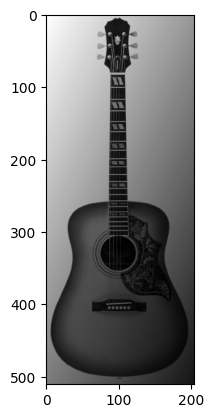

f(x,y) = -0.002x + -0.001y + 0.995


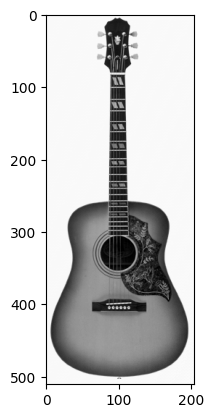

In [8]:
# problem 6
import numpy as np
from PIL import Image
from numpy.linalg import inv
import matplotlib.pyplot as plt

# To make the code work in VS code I had to comment out this part 
"""
# Load cguitar.tif from local machine into Colab instance
# Note: You only need to run this once
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
"""

img = np.asarray(Image.open('cguitar.tif'))

# Hint: Use the following lines to display an image
plt.imshow(img, cmap='gray')
plt.show()

# TODO: Compute least-squares estimate from selected corrupt pixels
trueColorValue = 255

A = np.zeros((250*50,3))

B = np.zeros(250*50)

j = 0
for y in range(250):
    for x in range(50):
        A [j,0] = trueColorValue*x
        A [j,1] = trueColorValue*y
        A [j,2] = trueColorValue
        B [j] = img[y,x]
        j = j+1

q = np.linalg.lstsq(A, B, rcond=None)[0]

a = q[0]
b = q[1]
c = q[2]

print('f(x,y) = {0:2.3f}x + {1:2.3f}y + {2:2.3f}'.format(q[0], q[1],q[2]))

# TODO: Undo the image corruption
correctedImage = np.zeros((len(img),len(img[0])))

for y in range(len(img)):
    for x in range(len(img[0])):
        correctedImage[y,x] = img[y,x] / (a*x + b*y + c)
        
# TODO: Display the uncorrupted image
plt.imshow(correctedImage, cmap='gray')
plt.show()

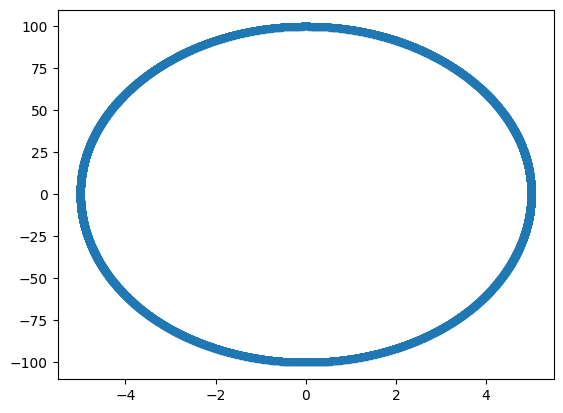

Estimated Rotational Angle : 0.52373005712857(rad)
Estimated Rotational Angle : 30.007521877612557°


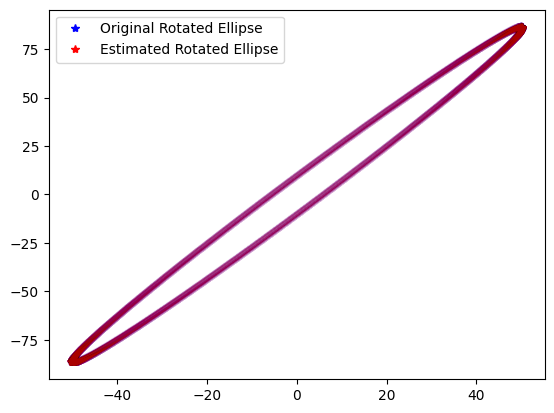

**** Trying A diffrent rotation angle *****


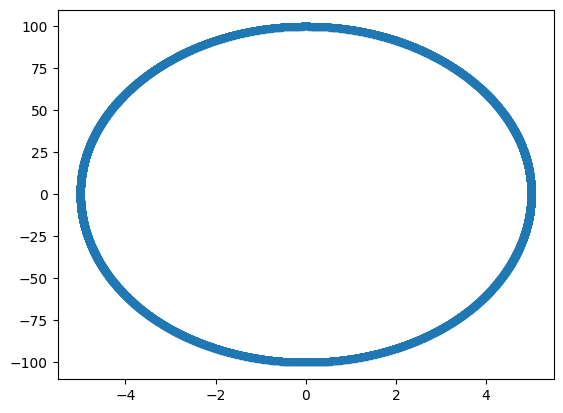

Estimated Rotational Angle : 0.7855294449277196(rad)
Estimated Rotational Angle : 45.00752187761257°


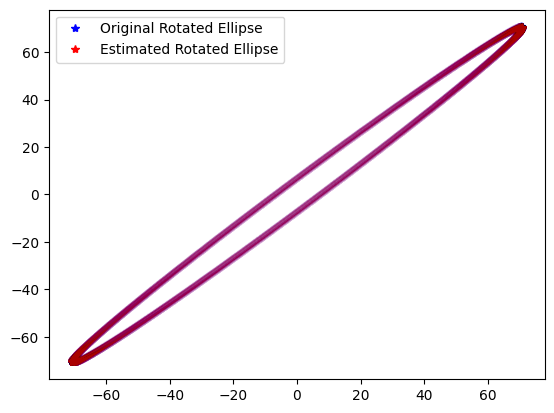

In [3]:
# problem 7
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create X and Y coordinates for ellipse
# TODO: Play around with these values to understand what each variable means
a, b = 5, 100

t = np.arange(0, 100, 0.01)

x = a*np.sin(t)
y = b*np.cos(t)

# Display the ellipse
plt.plot(x, y, '*-')
plt.show()

# Rotate the points of the ellipse
cc = np.cos(np.pi/6)
ss = np.sin(np.pi/6)

R = np.array([[cc, ss],
              [-ss, cc]])

pts = np.stack((x, y))

rpts = np.dot(R, pts)

rpts.shape

# TODO: Compute the rotated angle in radians and degrees from rpts
U,sigma,V = np.linalg.svd(rpts)

est_rot_angle = np.arctan(U[0,0]/U[1,0])

print('Estimated Rotational Angle : {}(rad)'.format(est_rot_angle))
print('Estimated Rotational Angle : {}\xb0'.format(np.rad2deg(est_rot_angle)))

# Rotate original points based on estimate
cc = np.cos(est_rot_angle)
ss = np.sin(est_rot_angle)

R = np.array([[cc, ss],
              [-ss, cc]])

pts = np.stack((x, y))

est_rpts = np.dot(R, pts)

# Display results
plt.plot(rpts[0,:], rpts[1,:], 'b*', alpha=0.01)
plt.plot(est_rpts[0,:], est_rpts[1,:], 'r*',alpha=0.01)
# TODO: add legend
orgPlot = (plt.Line2D([], [], color='b', marker="*", linewidth=0 ,label='Original Rotated Ellipse'))
estPlot = (plt.Line2D([], [], color='r', marker="*", linewidth=0 ,label='Estimated Rotated Ellipse'))
plt.legend(handles = [orgPlot,estPlot])
plt.show()

# TODO: Change the rotation angle and repeat computation
print('**** Trying A diffrent rotation angle *****')

a, b = 5, 100

t = np.arange(0, 100, 0.01)

x = a*np.sin(t)
y = b*np.cos(t)

# Display the ellipse
plt.plot(x, y, '*-')
plt.show()

# Rotate the points of the ellipse
cc = np.cos(np.pi/4)
ss = np.sin(np.pi/4)

R = np.array([[cc, ss],
              [-ss, cc]])

pts = np.stack((x, y))

rpts = np.dot(R, pts)

rpts.shape

# TODO: Compute the rotated angle in radians and degrees from rpts
U,sigma,V = np.linalg.svd(rpts)

est_rot_angle = np.arctan(U[0,0]/U[1,0])

print('Estimated Rotational Angle : {}(rad)'.format(est_rot_angle))
print('Estimated Rotational Angle : {}\xb0'.format(np.rad2deg(est_rot_angle)))

# Rotate original points based on estimate
cc = np.cos(est_rot_angle)
ss = np.sin(est_rot_angle)

R = np.array([[cc, ss],
              [-ss, cc]])

pts = np.stack((x, y))

est_rpts = np.dot(R, pts)

# Display results
plt.plot(rpts[0,:], rpts[1,:], 'b*', alpha=0.01)
plt.plot(est_rpts[0,:], est_rpts[1,:], 'r*',alpha=0.01)
# TODO: add legend
orgPlot = (plt.Line2D([], [], color='b', marker="*", linewidth=0 ,label='Original Rotated Ellipse'))
estPlot = (plt.Line2D([], [], color='r', marker="*", linewidth=0 ,label='Estimated Rotated Ellipse'))
plt.legend(handles = [orgPlot,estPlot])
plt.show()